In [2]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(0,'..')
import inferenceMetrics as im

inputPath = os.path.expanduser('~/drive/experiments/data/local/censeDomainSpecialization/')

top_classes = 3

# long
traffic = np.array([300, 307, 308, 309, 310, 315, 320, 321])
voice = np.arange(22) # 22
bird = 106+np.arange(11)
# short
traffic = np.array([300, 308, 310, 315, 320, 321])
voice = np.arange(4) # 22
bird = 106+np.arange(10)

reference = np.load(inputPath+'evalLorient_tvb_reference.npy')

showClasses = False

p = pd.read_csv('yamnet_class_map.csv')
print('matching ids for traffic')
print(p.iloc[traffic][['display_name']])
print('matching ids for voice')
print(p.iloc[voice][['display_name']])
print('matching ids for bird')
print(p.iloc[bird][['display_name']])

matching ids for traffic
                     display_name
300          Motor vehicle (road)
308                Car passing by
310                         Truck
315                           Bus
320                    Motorcycle
321  Traffic noise, roadway noise
matching ids for voice
                 display_name
0                      Speech
1  Child speech, kid speaking
2                Conversation
3        Narration, monologue
matching ids for bird
                                display_name
106                                     Bird
107  Bird vocalization, bird call, bird song
108                             Chirp, tweet
109                                   Squawk
110                             Pigeon, dove
111                                      Coo
112                                     Crow
113                                      Caw
114                                      Owl
115                                     Hoot


In [3]:
scores = np.load(inputPath+'evalLorient_scores.npy')
print(scores.shape)
presence = np.zeros((30, scores.shape[1], 3))
for k in range(30):
  presence[k, :, 0] = np.max(np.isin(np.argsort(scores[k, :, :])[:, -top_classes:], traffic), axis = 1).astype(int)
  presence[k, :, 1] = np.max(np.isin(np.argsort(scores[k, :, :])[:, -top_classes:], voice), axis = 1).astype(int)
  presence[k, :, 2] = np.max(np.isin(np.argsort(scores[k, :, :])[:, -top_classes:], bird), axis = 1).astype(int)

print(presence.shape)
np.save(inputPath+'evalLorient_tvb_prediction.npy', presence)

im.multiple_annotation_accuracy(presence, reference[:, :-5, :])

(30, 339, 521)
(30, 339, 3)
(30, 339, 3)
Accuracy is 74.60%, accuracy with confidence weighted labels is 74.02%
TP: 0.36, TN: 0.94, FP: 0.06, FN:0.64
Acc_s:
[0.66784661 0.83431662 0.73569322]
TP_s:
[0.19941421 0.63595597 0.34965229]
TN_s:
[0.983863   0.89736944 0.94676806]
FP_s:
[0.016137   0.10263056 0.05323194]
FN_s:
[0.80058579 0.36404403 0.65034771]
Active source proportion
[0.40285152 0.24119961 0.35349066]


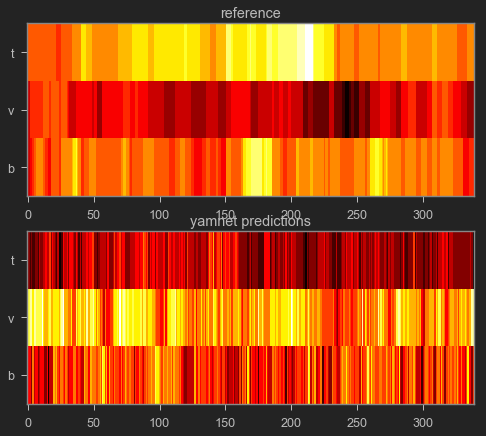

In [4]:
r = np.mean(np.round(np.mean(reference, axis=3)), axis=0)
p = np.mean(presence, axis=0)

#idx = np.random.randint(0, 30)
#r = np.round(np.mean(reference, axis=3))[idx]
#p = presence[idx]
            
fig, axs = plt.subplots(nrows=2)
axs[0].imshow(r[:339, :].T, cmap='hot', interpolation='nearest', aspect='auto')
axs[0].set_yticklabels(['t', 'v', 'b'])
axs[0].set_yticks(range(3))
axs[0].set_title('reference')
axs[1].imshow(p.T, cmap='hot', interpolation='nearest', aspect='auto')
axs[1].set_yticklabels(['t', 'v', 'b'])
axs[1].set_yticks(range(3))
axs[1].set_title('yamnet predictions')
plt.show()